In [0]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation

In [0]:
fashion_mnist = keras.datasets.fashion_mnist
a = fashion_mnist.load_data()

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [99]:
tr_image.shape

(60000, 28, 28)

In [100]:
tr_label.shape

(60000,)

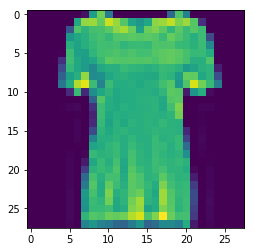

In [101]:
plt.figure()
plt.imshow(tr_image[10])
plt.show()

In [0]:
label_name = ['Top', 'Pants', 'Pullover', 'Dress', 'Coat', 'Sandle', 'Shirt', 'Sneaker', 'Bag', 'Shose']

TypeError: ignored

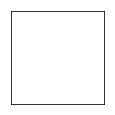

In [119]:
plt.figure(figsize = (10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(tr_image[i])
    plt.xlabel(label_name[tr_label[i]])
plt.show()

In [0]:
# nomalization
tr_image = tr_image.reshape(60000, 784).astype('float32') / 255.0
te_image = te_image.reshape(10000, 784).astype('float32') / 255.0

In [0]:
# one-hot encoding
tr_label = np_utils.to_categorical(tr_label)
te_label = np_utils.to_categorical(te_label)

In [106]:
tr_image.shape

(60000, 784)

In [0]:
val_image = tr_image[50000:]
val_label = tr_label[50000:]
tr_image  = tr_image[:50000]
tr_label  = tr_label[:50000]

In [108]:
val_image.shape

(10000, 784)

# 2. 모델 구성하기

In [0]:
model = Sequential()

# 처음에만 unit과 input_dim을 설정해주면 됨.
model.add(Dense(units = 64, input_dim = 28 * 28, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(units = 10, activation = 'softmax'))

# 3. 학습과정 설정하기 (시험 봄)

In [0]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])

# 4. 모델 학습과정 살펴보기

In [111]:
hist = model.fit(tr_image, tr_label, epochs = 100, batch_size = 32, validation_data = (val_image, val_label))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 11s 222us/step - loss: 0.8186 - acc: 0.7288 - val_loss: 0.5808 - val_acc: 0.7969
Epoch 2/100
50000/50000 [==============================] - 7s 134us/step - loss: 0.5166 - acc: 0.8217 - val_loss: 0.4976 - val_acc: 0.8232
Epoch 3/100
50000/50000 [==============================] - 7s 133us/step - loss: 0.4704 - acc: 0.8366 - val_loss: 0.6582 - val_acc: 0.7566
Epoch 4/100
50000/50000 [==============================] - 7s 132us/step - loss: 0.4436 - acc: 0.8444 - val_loss: 0.4487 - val_acc: 0.8402
Epoch 5/100
50000/50000 [==============================] - 7s 136us/step - loss: 0.4234 - acc: 0.8523 - val_loss: 0.4710 - val_acc: 0.8289
Epoch 6/100
50000/50000 [==============================] - 7s 135us/step - loss: 0.4093 - acc: 0.8569 - val_loss: 0.4281 - val_acc: 0.8524
Epoch 7/100
50000/50

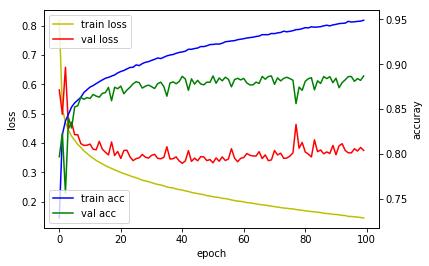

In [120]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [113]:
print('## training loss and acc ##')
print(hist.history['loss'])
print(hist.history['acc'])

## training loss and acc ##
[0.8186486392879486, 0.5165760624599457, 0.47043479216575623, 0.4436167073392868, 0.4233519397640228, 0.40926473320484164, 0.3950576042842865, 0.38492816801071167, 0.3731443838119507, 0.3647298250961304, 0.3554431644940376, 0.348131012339592, 0.34037877742528916, 0.3345790084528923, 0.32866234523296356, 0.3228199395656586, 0.3173443629074097, 0.3132564593434334, 0.3083640805006027, 0.30382867900848387, 0.2997962565946579, 0.2954736261630058, 0.2919341321563721, 0.2879847630929947, 0.2844636696600914, 0.28116590214252474, 0.2774494864964485, 0.27309346630096437, 0.2706280926990509, 0.2680893772125244, 0.2648351362347603, 0.2613286647415161, 0.25855208832859994, 0.25655331426024436, 0.25385219278097154, 0.2500876329767704, 0.24771666879892348, 0.2467942491054535, 0.24308072928905486, 0.2408882686471939, 0.2391220329129696, 0.2367189371371269, 0.23453948213338852, 0.23123612626314163, 0.22913805723428726, 0.22731877798557282, 0.2251477223944664, 0.2239171895176

# 모델 평가하기

In [114]:
loss_and_acc = model.evaluate(te_image, te_label, batch_size=32)
print('## evaluation  ##')
print(loss_and_acc)

10000/10000 [==============================] - 1s 51us/step
## evaluation  ##
[0.3981018568277359, 0.8799]


# 7. 모델 사용하기

In [115]:
xhat = te_image
yhat = model.predict(xhat)
print(yhat)

[[2.5825080e-09 6.0759414e-12 1.8240486e-10 ... 6.3971087e-04
  9.2054296e-07 9.9931443e-01]
 [8.3996143e-05 8.8501186e-11 9.9908233e-01 ... 5.7274247e-14
  1.0031520e-10 4.9187360e-18]
 [1.9443396e-08 1.0000000e+00 1.8993449e-13 ... 4.0957202e-15
  5.0338791e-13 3.5948832e-13]
 ...
 [6.5185573e-06 1.3314586e-12 1.9716599e-05 ... 2.7130817e-10
  9.9994802e-01 5.3406654e-14]
 [1.8394110e-07 9.9998820e-01 2.8745720e-08 ... 1.3080660e-09
  1.2098718e-09 1.6747796e-08]
 [1.0005569e-08 1.6844736e-09 4.1166830e-09 ... 1.6125663e-06
  2.6859882e-07 1.3040583e-09]]


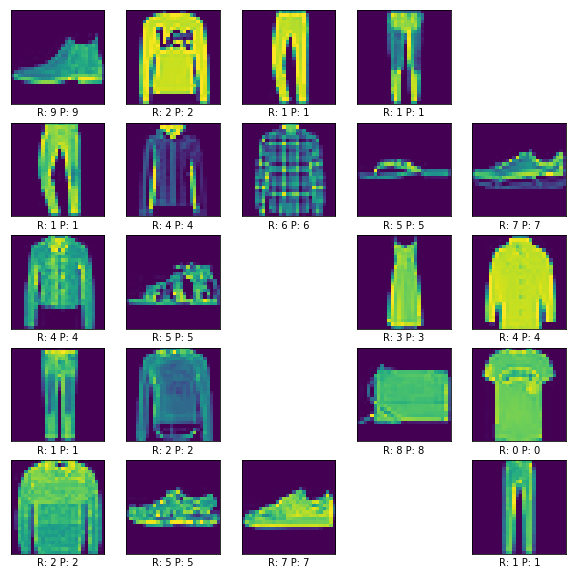

In [116]:

%matplotlib inline
import matplotlib.pyplot as plt



#plt_row = 10
#plt_col = 10


i = 0


plt.figure(figsize=(10,10))
for i in range(25):    
    if np.argmax(te_label[i]) == np.argmax(yhat[i]):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False) 
        plt.imshow(te_image[i].reshape(28, 28))
        plt.xlabel('R: ' + str(np.argmax(te_label[i])) + ' P: ' + str(np.argmax(yhat[i])))
        i += 1
      

plt.show()